

<h1 style="text-align: left; color:Indian_red; padding: 10px; border: 5px solid Indian_red;"> 
    T.P. n°1
    <span style="float:right;"> Bases de données - corrigé  </span>
</h1>


## 1. Utilisation de SQLite_browser


### 1.1. Instructions générales 

Dans les différentes séances de travaux pratiques, nous utiliserons le
logiciel `DB Browser for SQLite` défini par ses concepteurs comme *a
high quality, visual, open source tool to create, design, and edit
database files compatible with SQLite* .

Il vous suffira d'ouvrir le fichier `cinema.sqlite` disponible dans les
documents de classe en consultation.

L'onglet `Parcourir les données` permet de voir la structure de la table
étudiée, tandis qu'`Exécuter le SQL` permet de saisir des requêtes et de
les exécuter. Il est vivement conseillé de n'exécuter que la ligne
active (`Maj + F5`), ce qui permet de conserver une trace de toutes les
requêtes effectuées. Il est utile de copier ces lignes dans le document ci-dessous pour éviter tout risque de perte en cas de
plantage machine.

On utilisera les trois tables `film`, `acteur` et `casting`. Les schémas de ces trois tables
sont

-   `film` (**id**, titre, annee, note, nb\_votes, id\_realisateur)

-   `acteur` (**id**, nom)

-   `casting` (**id\_film**, **id\_acteur**, num)

Les clefs primaires sont mentionnées en gras 
(pour la table `casting`, la clef primaire est formée du couple `id_film`,
`id_acteur`). 
Dans la table `film`, le champ `id_realisateur` est une
clef étrangère qui renvoie au champ `id` de la table `acteur` (qui est en
fait une table actrice, acteur, réalisatrice ou réalisateur). Dans la
table `casting`, les champs `id_acteur` et `id_film` sont des clefs
étrangères qui renvoient respectivement aux tables `acteur` et `film`.

### 1.2. Premières requêtes


>**Question**   
Afficher le nombre de lignes de la table `casting`.

>**Réponse**  
```sql
SELECT COUNT(*) FROM casting;
```




>**Question**   
Afficher le numéro et le titre des films sortis en 2000. Les compter en
écrivant une autre requête.

>**Réponse**  
```sql
SELECT id, titre
FROM film
WHERE annee=2000;
```
 


>**Question**   
En quelle année le film « Forrest Gump » est-il sorti ?

>**Réponse**  
Attention à ne pas oublier les guillements ou apostrophes pour la chaîne de caractères.
```sql
SELECT annee
FROM film
WHERE titre='Forrest Gump';
```

>**Question**   
Lister tous les films dont le titre contient « Star Wars ». On utilisera
le test `LIKE` et les regex (LIKE \"%ab%\" reconnaît toutes les chaines
contenant le motif \"ab\") . Les trier par année de sortie.

>**Réponse**  
```sql
SELECT id, titre, annee
FROM film
WHERE titre LIKE '%Star Wars%'
  ORDER BY annee;
```
 


>**Question**   
Quel est l'identifiant de l'acteur Brad Pitt ?

>**Réponse**  
```sql
SELECT id
FROM acteur
WHERE nom='Brad Pitt';
```
 


>**Question**   
Afficher les titres des films dont l'identifiant est 7, 37 ou 133 (en
une unique requête bien entendu).

>**Réponse**  
```sql
SELECT titre
FROM film
WHERE id IN (7, 37, 133);
```
 


>**Question**   
Quel est le réalisateur des trois films précédents ? Même si la réponse
est évidente, vous devez écrire une requête. On pourra dans un premier
temps copier-coller l'identifiant du réalisateur.

>**Réponse**  
On peut choisir de procéder avec une double sélection
```sql
SELECT nom 
FROM acteur
WHERE id = (
    SELECT id_realisateur 
    FROM film 
    WHERE id=7);
```
> ou alors à l'aide d'une jointure.
```sql
SELECT nom 
FROM acteur
JOIN film 
    ON id_realisateur=acteur.id
WHERE film.id = 7;
```



### 1.3. Avec des jointures

>**Question**   
Le but de cette question est de retrouver les films réalisés par Quentin
Tarantino. On va utiliser deux méthodes :
>1. La mauvaise méthode :
>- Écrire une première requête pour obtenir l'identifiant >de Quentin Tarantino ;
>- Écrire une deuxième requête pour obtenir les films qu'il a réalisé en recopiant le résultat de la requête précédente.
>2.   La bonne méthode :
>-   Écrire une unique requête utilisant une jointure.

>**Réponse**  
>1. Mauvaise méthode
```sql
SELECT id_realisateur 
FROM acteur 
WHERE nom="Quentin Tarantino" ;
```
> qui donne l'identifiant 444 et permet la deuxième requête
```sql
SELECT * 
FROM film 
WHERE id_realisateur=444;
```

>2. Bonne méthode : avec une jointure
```sql
SELECT * FROM acteur
JOIN film 
  ON acteur.id = id_realisateur
WHERE nom="Quentin Tarantino";
```
 


>**Question**   
Quel est l'identifiant du film Casablanca ?

>**Réponse**  
```sql
SELECT id 
FROM film 
WHERE titre='Casablanca';
```
 


>**Question**   
Afficher le casting (c'est-à-dire la liste des acteurs) du film
Casablanca en copiant-collant l'identifiant obtenu à la question
précédente.

>**Réponse**  
```sql
SELECT nom 
FROM acteur
JOIN casting
  ON id_acteur=id
WHERE id_film=27 ;
```
 


>**Question**   
Obtenir le casting du film Alien en utilisant une unique requête
(c'est-à-dire sans utiliser de copier-coller comme à la question
précédente). On pourra réaliser plusieurs jointures.

>**Réponse**  
>1. Version avec une seule jointure et une sélection composée.
```sql
SELECT nom 
FROM acteur
JOIN casting 
  ON id_acteur=id
WHERE id_film= 
   (SELECT id FROM film
    WHERE titre='Alien');
```

>2. Deuxième version plus lisible utilisant deux jointures.
```sql
SELECT nom 
FROM casting
JOIN film 
  ON film.id = id_film
JOIN acteur 
  ON acteur.id = id_acteur
WHERE titre='Alien';
```
 


>**Question**   
Lister les films dans lesquels a joué Harrison Ford. On impose ici l'utilisation d'une double jointure.

>**Réponse**  
```sql
SELECT titre 
FROM film
JOIN casting 
  ON id_film=film.id
JOIN acteur 
  ON id_acteur=acteur.id
WHERE nom = 'Harrison Ford';
```
 


>**Question**   
Lister les films dans lesquels Harrison Ford a joué un second rôle. Les premiers rôles correspondent à num=1.

>**Réponse**  
```sql
SELECT titre FROM film
JOIN casting 
  ON id_film=film.id
JOIN acteur 
  ON id_acteur=acteur.id
WHERE nom = 'Harrison Ford' AND num=1;
```
 


>**Question**   
Lister tous les films de la base de données sortis en 2000 en précisant le nom de l'acteur jouant le rôle principal.

>**Réponse**  
```sql
SELECT titre, nom FROM film
JOIN casting 
  ON film.id = id_film
JOIN acteur 
  ON acteur.id = id_acteur
WHERE annee=2000 AND num=1;
```
 


### 1.4. Avec des fonctions d'agrégation
>**Question**   
Afficher la liste des acteurs ayant eu au moins 10 rôles
principaux, accompagné du nombre de rôles. Le résultat sera trié par
ordre décroissant du nombre d'apparition, puis ordre alphabétique à
nombre d'apparition égal.

>**Réponse**  
```sql
SELECT nom,count(nom) as nb_apparition 
FROM casting
JOIN acteur 
  ON id_acteur=id WHERE num=1
GROUP BY nom
HAVING nb_apparition>10
    ORDER BY nb_apparition DESC, nom
```
 


>**Question**   
Afficher les 5 films sortis en 2000 ayant le plus grand nombre
d'acteurs. Le résultat devra apparaître par ordre décroissant.

>**Réponse**  
```sql
SELECT titre, count(id_acteur) AS x 
FROM film
JOIN casting 
  ON id_film = id
WHERE annee = 2000
GROUP BY titre
    ORDER BY x DESC
```
 


>**Question bonus**   
Pour tous les films dans lesquels Tom Hanks a joué, afficher le
titre et le nom de l'acteur jouant le rôle principal.

>**Réponse**  
```sql
SELECT titre, nom 
FROM casting
JOIN acteur 
  ON acteur.id = id_acteur
JOIN film 
  ON film.id = id_film
WHERE num=1 AND film.id IN 
   (SELECT id_film 
    FROM casting
    JOIN acteur 
        ON id = id_acteur
    WHERE nom = "Tom Hanks");
```
 


## 2. Interaction avec des bases de données à l'aide de Python


Les données que nous allons utiliser sont issues du [site suivant](http://sql.sh/736-base-donnees-villes-francaises) .

Elles concernent les communes de France métropolitaine (sans les départements d'Outre-Mer).

La base que nous allons utiliser contient trois tables.

-   La table `communes` dont les attributs sont:
    - `nom` de type chaîne de caractères, 
    - `canton` de type entier,
    - `num_departement` de type chaîne de caractères,
    - `population_1999` et `population_2010` de type entier,
    - `surface` de type flottant,
    - `longitude` et `latitude` de type entier,
    - `zmin` et~`zmax` de type entier.

-   La table `departements` dont les attributs sont:
    - `nom` de type chaîne de caractères, 
    - `num_departement` de type chaîne de caractères,
    - `num_region` de type entier.

-   La table `regions` dont les attributs sont:
    - `nom` de type chaîne de caractères, 
    - `num_region` de type entier.

Précisions :

-   les numéros sont tous de type entier, sauf pour les départements à
    cause de la Corse (2A et 2B);

-   les attributs concernant la population sont des données provenant de
    deux recensements;

-   la surface est en km$^2$;

-   les attributs `zmin` et `zmax` sont les altitudes minimales et
    maximales par rapport au niveau de la mer;

-   les longitudes et latitudes sont en grades !

On rappelle que chaque commune appartient à un département, et que
chaque département appartient à une région.

La base se trouve dans le fichier `France.sqlite` que l'on pourra consulter à l'aide du logiciel précédent puis en utilisant le module `sqlite3` de Python.

Pour travailler sur la base avec `Python`, on utilise le
module `sqlite3` à l'aide des commandes suivantes.

In [1]:
import sqlite3
import pylab as pl

base = sqlite3.connect('France.sqlite')
curseur = base.cursor()

def affiche_requete(req,i_proj=-1):
    '''
    entrée : chaîne de caractère de la requête
    sortie : affiche du résultat
    '''
    res=curseur.execute(req)
    if i_proj==-1:
        for ligne in res:
            print(ligne)
    else:
        for ligne in res:
            print(ligne[i_proj])

In [11]:
# permet d'écrire des chaines de caractères sur plusieurs lignes
req='''
SELECT * FROM communes 
'''

# affichage de la table complète
# affiche_requete(req)

# affichage du seul nom des villes
# affiche_requete(req,1)

### 2.1. Requêtes à une table


>**Question**     
Quelles sont les villes dont une partie se trouve en dessous du niveau de la mer ?

In [14]:
req="""
SELECT nom, zmin , longitude , latitude FROM communes
"""

# affiche_requete(req,0)

>**Question**     
Quelles sont les dix plus petites communes en terme de superficie?

In [15]:
req="""
SELECT nom, surface FROM communes 
ORDER BY surface ASC  LIMIT 10
"""

affiche_requete(req)

("Castelmoron-d'Albret", 0.04)
('Plessix-Balisson', 0.08)
('Vaudherland', 0.09)
('Lannoy', 0.18)
('Saint-Antoine', 0.2)
('Mallièvre', 0.2)
('La Ferrière-sur-Risle', 0.24)
('Sainte-Marie', 0.28)
('Bourg-le-Roi', 0.36)
('Mont-Louis', 0.39)


>**Question**     
Quelle est la deuxième commune la plus plate de France ?

In [18]:
req="""
SELECT nom, (zmax-zmin) , zmax , zmin 
FROM communes 
ORDER BY (zmax-zmin) ASC
LIMIT 1 OFFSET 1
"""

affiche_requete(req)

('Magenta', 2, 70, 68)


>**Question**     
Donner le nom et le nombre d'habitants de chacune des communes des  Yvelines en les triant par ordre décroissant de population en 2010.   
Combien y en a-t-il ?

In [20]:
# Villes, population
req1="""
SELECT nom , population_2010 FROM communes WHERE num_departement = 78 
ORDER BY population_2010 DESC
"""

# Nombre communes
req2="""
SELECT COUNT(nom) FROM communes WHERE num_departement = 78 
"""

# affiche_requete(req2),affiche_requete(req1)

>**Question**    
Combien y avait-il d'habitants en France en 1999 et 2010?

In [21]:
req="""
SELECT SUM(population_1999) , SUM(population_2010) FROM communes
"""

affiche_requete(req)

(58441978, 62773669)


### 2.2. Jointures

>**Question**     
Quels sont les noms des départements dont une commune n'a plus d'habitant en 2010.

In [22]:
req="""
SELECT departements.nom , (population_2010 - population_1999) AS evol FROM communes
JOIN departements 
ON departements.num_departement=communes.num_departement 
GROUP BY departements.nom
HAVING evol<0
"""

affiche_requete(req)

('Aisne', -19)
('Aveyron', -18)
('Bas Rhin', -36)
('Cantal', -62)
('Creuse', -37)
("Côte d'or", -11)
('Deux Sèvres', -6)
('Eure', -2)
('Eure et Loir', -1)
('Gers', -6)
('Haute Marne', -28)
('Indre', -28)
('Landes', -12)
('Loire', -9)
('Marne', -50)
('Meurthe et Moselle', -46)
('Meuse', -2)
('Nièvre', -2)
('Pas de Calais', -53)
('Rhône', -34)
('Savoie', -21)
('Saône et Loire', -6)
('Vosges', -31)
('Yonne', -1)


>**Question**     
Trier les noms des départements par nombre d'habitants, puis par densité de population.

In [128]:
req="""
SELECT departements.nom , SUM(population_2010) as nb_pol FROM communes 
JOIN departements ON departements.num_departement=communes.num_departement \
GROUP BY communes.num_departement
ORDER BY nb_pol DESC
"""

# affiche_requete(req)

### 2.3. Représentation sur une carte


Nous allons utiliser les coordonnées des villes pour tracer une carte de France. Le fait que les longitudes et latitudes soient exprimées en grades n'a pas de conséquence. En revanche, on pourra corriger la longitude à l'aide de la latitude.

Le tracé de la carte de France est effectué grace au module `contour` que vous pourrez analyser.

>**Question**     
Représenter chaque commune par un point dont la couleur dépend de  l'altitude la plus basse de son territoire. Des éléments sont donnés dans le code ci-dessous.

len(Ly) =  36568
len(Ly)/bande =  182.84


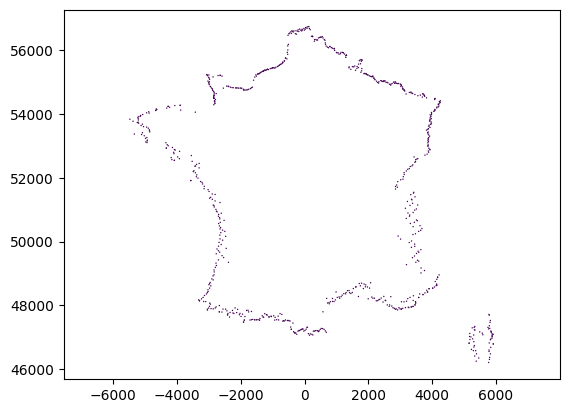

(-6047.717035886761, 6484.12424200103, 45449.05, 57283.95)

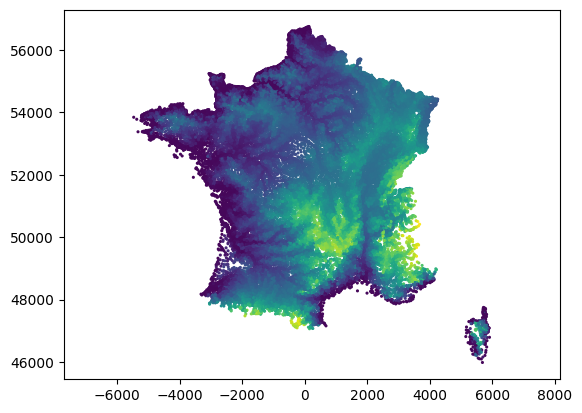

In [23]:
import contour

req="""
SELECT longitude, latitude, 100+zmin FROM communes
"""



res = curseur.execute(req);
Lx,Ly,Lz=[],[],[]
for ligne in res:
    Lx.append(ligne[0]*pl.cos(ligne[1]*pl.pi/200000))
    Ly.append(ligne[1])
    Lz.append(pl.log(ligne[2]))
    
pl.scatter(Lx,Ly,c=Lz,s=5,linewidths=0)
pl.axis('equal')

>**Question**    
Dessiner la carte des départements. On utilisera la
fonctions `hash` pour définir les couleurs en fonction du numéro ou du nom du département.

(-6047.717035886761, 6484.12424200103, 45449.05, 57283.95)

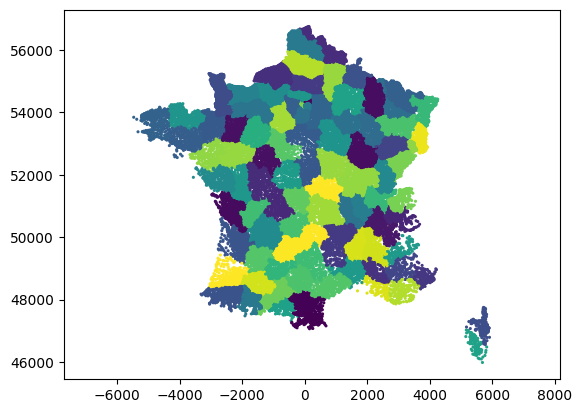

In [26]:
req="""
SELECT longitude, latitude, num_departement FROM communes
"""

res = curseur.execute(req);
Lx,Ly,Lz=[],[],[]

def couleur(d):
    return hash(d)
    
for ligne in res:
    Lx.append(ligne[0]*pl.cos(ligne[1]*pl.pi/200000))
    Ly.append(ligne[1])
    Lz.append(couleur(ligne[2]))

pl.scatter(Lx,Ly,c=Lz,s=5,linewidths=0)
pl.axis('equal')

>**Question**   
Représenter, par des points de couleur, les 1500 communes les plus denses de métropole.

(-6400.454531147685, 6647.120841831996, 46980.75, 57172.25)

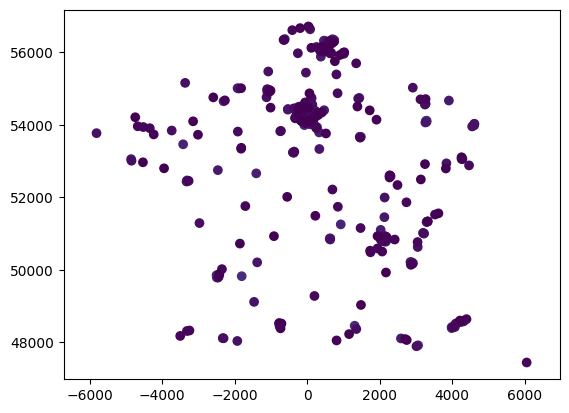

In [25]:
req="""
SELECT longitude, latitude, population_2010/surface AS e 
FROM communes
WHERE num_departement <= 95
ORDER by e DESC
LIMIT 500
"""

res = curseur.execute(req);

corr=pl.cos(40*pl.pi/180)

Lx,Ly,Lz=[],[],[]
for ligne in res:
    Lx.append(ligne[0])
    Ly.append(ligne[1])
    Lz.append(ligne[2])
pl.scatter(corr*pl.vectorize(float)(Lx),Ly,c=Lz)
pl.axis('equal')
